In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [29]:
df = pd.read_csv("/content/sample_data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [30]:
df.shape

(768, 9)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [33]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [34]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [35]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [36]:
feature_columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
]

for column in feature_columns:
    print(f"column, {column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

column, Pregnancies ==> Missing zeros : 111
column, Glucose ==> Missing zeros : 5
column, BloodPressure ==> Missing zeros : 35
column, SkinThickness ==> Missing zeros : 227
column, Insulin ==> Missing zeros : 374
column, BMI ==> Missing zeros : 11
column, DiabetesPedigreeFunction ==> Missing zeros : 0
column, Age ==> Missing zeros : 0


In [37]:
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)
df[feature_columns] = fill_values.fit_transform(df[feature_columns])

for column in feature_columns:
    print(f"column,{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

column,Pregnancies ==> Missing zeros : 0
column,Glucose ==> Missing zeros : 0
column,BloodPressure ==> Missing zeros : 0
column,SkinThickness ==> Missing zeros : 0
column,Insulin ==> Missing zeros : 0
column,BMI ==> Missing zeros : 0
column,DiabetesPedigreeFunction ==> Missing zeros : 0
column,Age ==> Missing zeros : 0


In [38]:
X = df[feature_columns]
y = df.Outcome

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

Bagging Algorithms

In [41]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=10)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[347   2]
 [  7 181]]
ACCURACY SCORE:
0.9832
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.980226    0.989071   0.98324    0.984649      0.983323
recall       0.994269    0.962766   0.98324    0.978518      0.983240
f1-score     0.987198    0.975741   0.98324    0.981469      0.983187
support    349.000000  188.000000   0.98324  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[122  29]
 [ 42  38]]
ACCURACY SCORE:
0.6926
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.743902   0.567164  0.692641    0.655533      0.682694
recall       0.807947   0.475000  0.692641    0.641474      0.692641
f1-score     0.774603   0.517007  0.692641    0.645805      0.685392
support    151.000000  80.000000  0.692641  231.000000    231.000000


In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Create a BaggingClassifier
base_classifier = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Fit the BaggingClassifier
bagging_clf.fit(X_train, y_train)

# Calculate and store accuracy scores for Bagging Classifier
bagging_scores = {
    'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
    'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
}

# Calculate and store accuracy scores for Bagging Classifier
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}

# Calculate and store accuracy scores for Random Forest
scores['Random Forest'] = {
    'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
    'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
}


Boosting Algorithms

In [43]:
from xgboost.sklearn import XGBClassifier

XGB_boost_clf = XGBClassifier(n_estimators=30)
XGB_boost_clf.fit(X_train, y_train)
evaluate(XGB_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[348   1]
 [  3 185]]
ACCURACY SCORE:
0.9926
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.991453    0.994624  0.992551    0.993038      0.992563
recall       0.997135    0.984043  0.992551    0.990589      0.992551
f1-score     0.994286    0.989305  0.992551    0.991795      0.992542
support    349.000000  188.000000  0.992551  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[117  34]
 [ 25  55]]
ACCURACY SCORE:
0.7446
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.823944   0.617978  0.744589    0.720961      0.752613
recall       0.774834   0.687500  0.744589    0.731167      0.744589
f1-score     0.798635   0.650888  0.744589    0.724761      0.747467
support    151.000000  80.000000  0.744589  231.000000    231.000000


In [44]:
scores['XGBBoost'] = {
        'Train': accuracy_score(y_train, XGB_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, XGB_boost_clf.predict(X_test)),
    }

In [45]:
from lightgbm import LGBMClassifier

LGBM_clf = LGBMClassifier(n_estimators=10, random_state=42)
LGBM_clf.fit(X_train, y_train)
evaluate(LGBM_clf, X_train, X_test, y_train, y_test)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 612
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [46]:
scores['LGBM'] = {
        'Train': accuracy_score(y_train, LGBM_clf.predict(X_train)),
        'Test': accuracy_score(y_test, LGBM_clf.predict(X_test)),
    }

In [47]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define classifiers
log_reg = LogisticRegression(solver='liblinear')
tree = DecisionTreeClassifier()
svm_clf = SVC(gamma='scale')

estimators = [('Logistic', log_reg), ('Tree', tree), ('SVM', svm_clf)]

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)
evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[327  22]
 [ 82 106]]
ACCURACY SCORE:
0.8063
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.799511    0.828125  0.806331    0.813818      0.809529
recall       0.936963    0.563830  0.806331    0.750396      0.806331
f1-score     0.862797    0.670886  0.806331    0.766841      0.795610
support    349.000000  188.000000  0.806331  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[130  21]
 [ 36  44]]
ACCURACY SCORE:
0.7532
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.783133   0.676923  0.753247    0.730028      0.746350
recall       0.860927   0.550000  0.753247    0.705464      0.753247
f1-score     0.820189   0.606897  0.753247    0.713543      0.746322
support    151.000000  80.000000  0.753247  231.000000    231.000000


In [48]:
scores['Voting'] = {
        'Train': accuracy_score(y_train, voting.predict(X_train)),
        'Test': accuracy_score(y_test, voting.predict(X_test)),
    }

<Axes: >

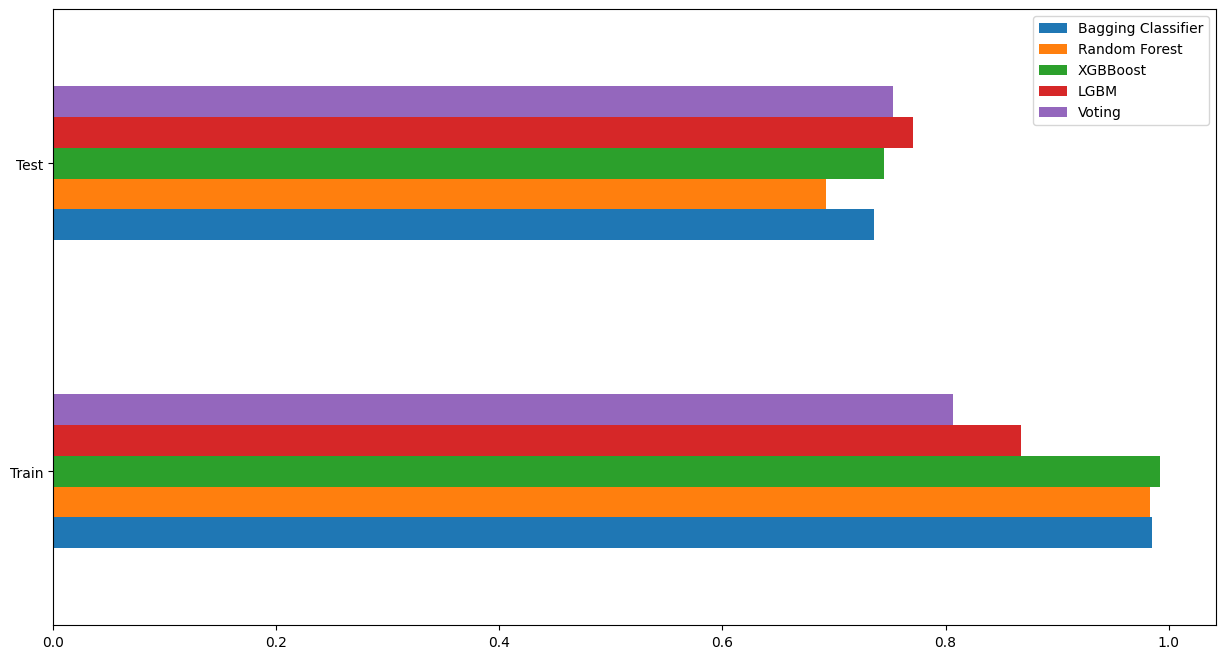

In [49]:
scores_df = pd.DataFrame(scores)
scores_df.plot(kind='barh', figsize=(15, 8))